In [1]:
# Importing necessary libraries
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding 

# Define documents
docs = ['Well done!',
        'Good work',
        'Great effort',
        'nice work',
        'Excellent!',
        'Weak',
        'Poor effort!',
        'not good',
        'poor work',
        'Could have done better.']

# Define class labels
labels = array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

# Integer encode the documents
vocab_size = 50
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)

# Pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[9, 18], [49, 11], [40, 44], [28, 11], [15], [1], [5, 44], [39, 49], [5, 11], [41, 22, 18, 17]]
[[ 9 18  0  0]
 [49 11  0  0]
 [40 44  0  0]
 [28 11  0  0]
 [15  0  0  0]
 [ 1  0  0  0]
 [ 5 44  0  0]
 [39 49  0  0]
 [ 5 11  0  0]
 [41 22 18 17]]


In [2]:
# Model gốc

# Define the model
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summarize the model
print(model.summary())

# Fit the model
model.fit(padded_docs, labels, epochs=50, verbose=0)

history = model.fit(padded_docs, labels, epochs=50, verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy * 100))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 8)              400       
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 433 (1.69 KB)
Trainable params: 433 (1.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Accuracy: 100.000000


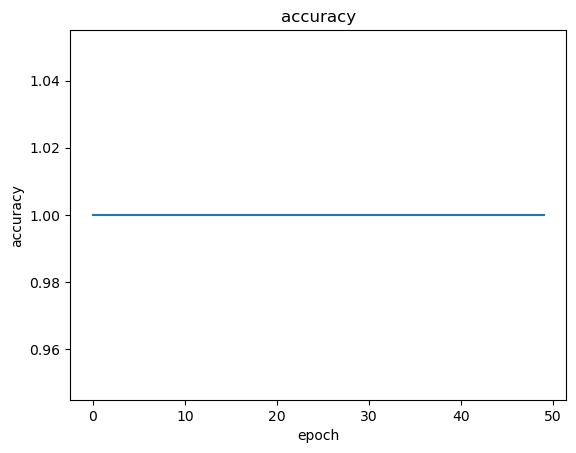

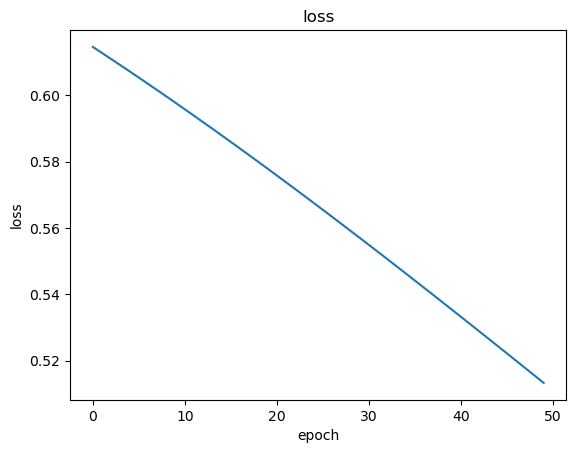

In [3]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [4]:
# Model 2: Sử dụng 1 lớp ẩn 16 neutron

model2 = Sequential()
model2.add(Embedding(vocab_size, 8, input_length=max_length))
model2.add(Flatten())
model2.add(Dense(16, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print(model2.summary())

model2.fit(padded_docs, labels, epochs=50, verbose=0)

history2 = model2.fit(padded_docs, labels, epochs=50, verbose=0) 

loss, accuracy = model2.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy * 100))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 4, 8)              400       
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 945 (3.69 KB)
Trainable params: 945 (3.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Accuracy: 100.000000


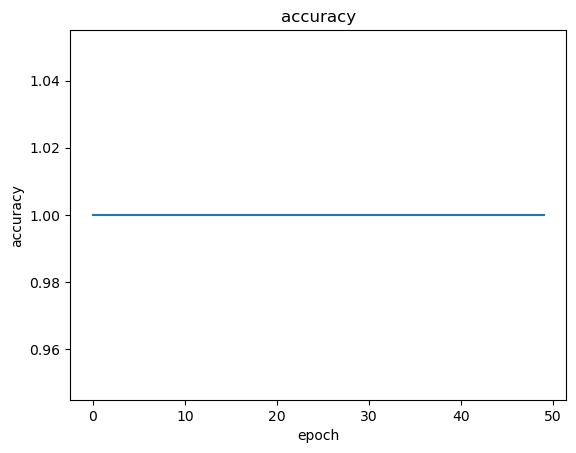

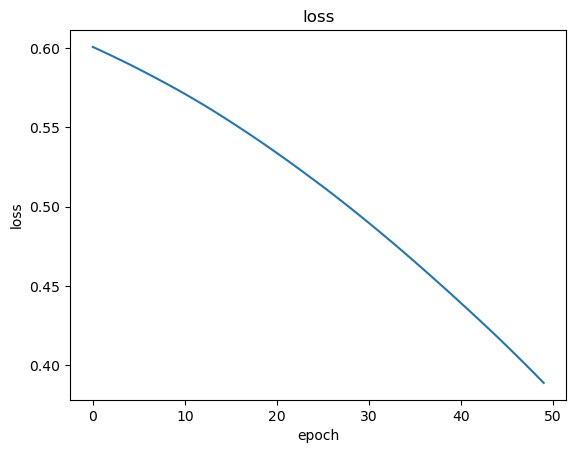

In [5]:
import matplotlib.pyplot as plt

plt.plot(history2.history['accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history2.history['loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [6]:
# Model 3: Sử dụng 4 lớp ẩn với 64, 32, 16, 8 neutron

model3 = Sequential()
model3.add(Embedding(vocab_size, 8, input_length=max_length))
model3.add(Flatten())
model3.add(Dense(64, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print(model3.summary())

model3.fit(padded_docs, labels, epochs=50, verbose=0)

history3 = model3.fit(padded_docs, labels, epochs=50, verbose=0)

loss, accuracy = model3.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy * 100))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 4, 8)              400       
                                                                 
 flatten_2 (Flatten)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2577 (10.07 KB)
Trainable params: 2577 (10.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Accuracy: 100.000000


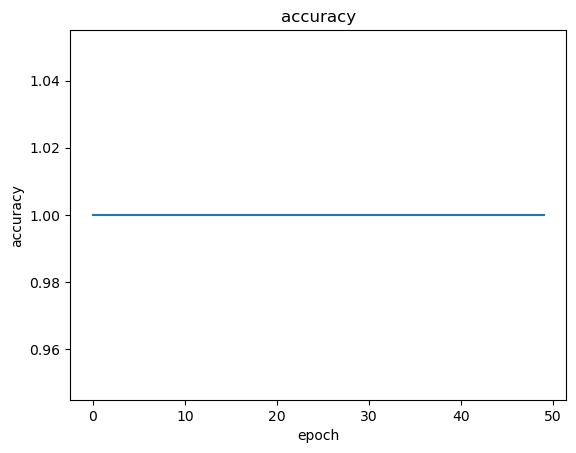

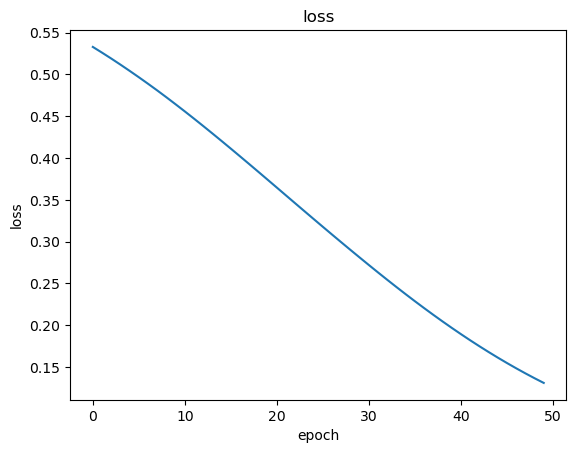

In [7]:
import matplotlib.pyplot as plt

plt.plot(history3.history['accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history3.history['loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [8]:
import matplotlib.pyplot as plt

plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])

plt.title('accuracy vs epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

NameError: name 'history1' is not defined